William Bo 

STA130 

HW 07

**QUESTION 1)**

1.1) Simple linear regression is the relationship between a singular predictor variable, and the response modeled by fitting a straight line. Multiple linear regression uses two or more predicters in order to capture a more complex model through considering multiple factors. The benefit of multiple linear regression is that it provides a more complex explaination by considering multiple variables, this could potentially improve predictions. 

1.2) A continuous variable in Simple Linear Regression is a numerical variable which allows for our model to fit a continuous smooth line across a range of values. An indicator variable is a binary variable which represents categorical information in numerical ways. With a coninuous variable, a model predicts the response across multiple values. With an indicator, the model splits the prediction into two levels (ie males and females), resulting in a stepwise like effect. 

1.3) When a continuous and an indicator variable are combined in Multiple Linear Regression, the model differentiates predictions based on the indicator while adjusting the predictions within each group based on the continuous variable. The model can now adapt to different groups, modeling variations in the responses within each of the groups, and reflecting data that may have differing trends or intercepts across categories. 

1.4) An interaction between continous and indicator variable allows the model to fit separate slopes for each level of the indicator variables. The interaction creates a model where the relationship between the continuous predictor and the response is differing by indicator variable, which enables the model to capture trends from specific groups. 

1.5) When using only indicator variables from non-binary categorical variables, the model distinguishes between multiple groups by separating using binary indicators for each category. The resulting model represents the response as a set of distinct levels based on categories, capturing group-specific intercepts. The group contributes one indicator variable, giving it a segmented view of the data across the categorical groups. 

**QUESTION 2**

2.1)

Additive Model:
To make predictions using the additive model, plug in the values for the TV and Online ad budgets:
Sales = beta_0 + beta_TV * TV + beta_Online * Online
In this model, each budget affects sales independently, so the impact of TV ads on sales is the same no matter how much is spent on online ads, and vice versa.
Interaction Model:
For the interaction model, include an extra term for the interaction between TV and Online budgets:
Sales = beta_0 + beta_TV * TV + beta_Online * Online + beta_TV-Online * (TV * Online)
The interaction term (TV * Online) allows us to model cases where the effect of one budget depends on the level of the other. This can show that high spending in both might boost sales more than just adding each effect alone.


2.2) 

Additive Model with Binary Variables:
If we consider ad budgets as binary (where TV = 1 for high and TV = 0 for low, and similarly for Online), the formula is:
Sales = beta_0 + beta_TV * TV + beta_Online * Online
Here, each budget level’s effect is independent of the other, meaning each contributes to sales without interacting.
Interaction Model with Binary Variables:
Adding an interaction term with binary variables, the formula becomes:
Sales = beta_0 + beta_TV * TV + beta_Online * Online + beta_TV-Online * (TV * Online)
In this model, the interaction term (TV * Online) applies only when both budgets are high. This captures a scenario where the combined effect of both high budgets is greater than just adding up their separate effects.


In [3]:
# QUESTION 3


import pandas as pd
import statsmodels.formula.api as smf

# Load the dataset
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokemon = pd.read_csv(url).fillna('None')

# Create a binary outcome variable (e.g., 'str8fyre' for whether Type 1 is Fire)
pokemon['str8fyre'] = (pokemon['Type 1'] == 'Fire').astype(int)


# Define an additive model with continuous, binary, and categorical variables
formula_additive = 'str8fyre ~ Attack + Defense + C(Generation)'

# Fit logistic regression using statsmodels
log_reg_additive = smf.logit(formula_additive, data=pokemon).fit()

# Display the model summary
print(log_reg_additive.summary())


# Define a model with interaction terms for synergy
formula_synergistic = 'str8fyre ~ Attack*Defense + C(Generation)'

# Fit logistic regression with interactions
log_reg_synergistic = smf.logit(formula_synergistic, data=pokemon).fit()

# Display the model summary
print(log_reg_synergistic.summary())


Optimization terminated successfully.
         Current function value: 0.232289
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               str8fyre   No. Observations:                  800
Model:                          Logit   Df Residuals:                      792
Method:                           MLE   Df Model:                            7
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                 0.03418
Time:                        23:31:49   Log-Likelihood:                -185.83
converged:                       True   LL-Null:                       -192.41
Covariance Type:            nonrobust   LLR p-value:                   0.06850
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.3765      0.498     -4.768      0.000      -3.353      -1.400
C(Gen

**QUESTION 3 CONT.** 

3.3) 

Additive Model: 
the attack and defence coefficients indicate that the change in the log odds of being a "fire"-type pokemon are a one-unit increase in these variables 
The categorical levels adjust the baseline log odds for different generations 

Synergistic model: 
the attack * defense interaction captures how the joint effect of attack and defence on the log odds deviates from their individual additive effects 
The generation is retained as an adjuster for systematic differences across generations. 

For logistic regression, exponentiating the coefficient give the odds ratio for predictors. treating log odds as linear makes it easier to interpret the additive relationships. 

3.4) by using the .summary() output: 

the P-values evaluate the null hypothesis that the predictor's coefficient is zero. 
The significant predictors are variables with p-values < 0.05 provide statistically significant evidence for their contribution to the model. 
if the interaction term's p-value is low, it suggests a significant synergistic effect. 

In [5]:
import numpy as np
import plotly.express as px

# Simulate predictor data for plotting
np.random.seed(42)
attack_vals = np.linspace(50, 150, 100)
defense_vals = attack_vals + np.random.normal(0, 10, size=100)
binary_vals = np.random.choice([0, 1], size=100)
generation_vals = np.random.choice(range(1, 7), size=100)

# Generate outcome probabilities for visualization
additive_probs = log_reg_additive.predict(pd.DataFrame({
    'Attack': attack_vals,
    'Defense': defense_vals,
    'Generation': generation_vals
}))

synergistic_probs = log_reg_synergistic.predict(pd.DataFrame({
    'Attack': attack_vals,
    'Defense': defense_vals,
    'Generation': generation_vals
}))

# Plot Additive Specification
fig_additive = px.scatter(x=attack_vals, y=additive_probs, title="Additive Specification")
fig_additive.update_traces(mode='markers+lines')
fig_additive.show()

# Plot Synergistic Specification
fig_synergistic = px.scatter(x=attack_vals, y=synergistic_probs, title="Synergistic Specification")
fig_synergistic.update_traces(mode='markers+lines')
fig_synergistic.show()


In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [7]:
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        23:49:56   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**QUESTION 4)**

4) \(R^2\) measures the proportion of variance in the outcome explained by the model. A low \(R^2\), such as 17.6%, indicates that the predictors collectively explain only a small portion of the variability in the data. This suggests that unmeasured factors or noise significantly influence the outcome. On the other hand, p-values test whether individual predictors have a statistically significant effect on the outcome. A small p-value (e.g., \(p < 0.05\)) provides strong evidence of an effect, while coefficients measure the magnitude of that effect. For example, a coefficient greater than 10 indicates a large change in the outcome for a one-unit change in the predictor. These two metrics can appear contradictory but address different aspects of model evaluation. A model can have a low \(R^2\) if the predictors leave much of the outcome unexplained, but individual predictors can still have significant effects, reflected in small p-values and large coefficients. The key difference is that \(R^2\) measures overall model performance, while p-values test the significance of individual predictors. For example, in the model `HP ~ Q("Sp. Def") * C(Generation)`, a low \(R^2\) (e.g., 17.6%) suggests most variability in `HP` is due to other factors. However, significant p-values for predictors like `Sp. Def` or its interactions with `Generation` mean those predictors still have meaningful relationships with `HP`. Therefore, \(R^2\) and p-values are not contradictory. A low \(R^2\) reflects poor global fit, while significant p-values indicate that individual predictors are impactful.

**QUESTION 5)**

First Code Block: Replaces missing values with "None", randomly splits the pokemon dataset into two halves, the training set and the testing set, and uses a seed to be reproducable 

Second Code Block: Fits a simple linear regression model using the training data (pokeaman_train) to predict the outcome variable HP based on the predictors of Attack and Defense. 

Third Code Block: evaluates the performance of the regression model from both in-sample, and out-of-sample contexts. 

Fourth Code Block: fits a complex linear regression model with multiple predictors and their interactions in order to explain the HP of pokemon in the training dataset. 

Fifth Code Block: Evaluates the performance of the complex regression model by comparing its in-sample R^2 and out-of-sample R^2 

Overall Function: illustrates both in-sample vs out-of-sample model performance metrics (specifically R^2) in the context of linear regression. 

**QUESTION 6)**

The `model4_linear_form` creates new predictor variables by specifying main effects and interaction terms, which are represented as columns in the "design matrix" (`model4_spec.exog`). Each term in the formula, such as `Attack * Defense`, generates multiple columns: one for each main effect (`Attack` and `Defense`) and one for their interaction (`Attack:Defense`). The shape of this matrix (`model4_spec.exog.shape`) reflects the number of rows (observations) and columns (predictor variables and interactions). The outcome variable, `model4_spec.endog`, represents the dependent variable, `HP`, being predicted.

The "design matrix" (`model4_spec.exog`) suffers from multicollinearity, as observed through high correlations between its columns (`np.corrcoef(model4_spec.exog)`), particularly due to the inclusion of interaction terms and redundant predictors. This multicollinearity inflates standard errors, making coefficient estimates unstable and overly sensitive to small changes in the data. As a result, the model fits noise in the training data rather than capturing true patterns, leading to overfitting. The poor "out-of-sample" generalization of predictions from `model4_fit` is evidenced by a sharp drop in "out-of-sample" \(R^2\), indicating that the overfit model fails to generalize to unseen data. Simplifying the model, reducing interaction terms, and centering/scaling predictors can mitigate multicollinearity and improve generalizability.

**QUESTION 7)**

The process of developing `model7_fit` from `model3_fit` shows how models can be improved iteratively to find a balance between complexity and generalization. `model3_fit` was simple, using only `Attack` and `Defense` as predictors, which kept multicollinearity low and allowed it to generalize well to new data. However, `model4_fit` added too many predictors and interactions, making it overly complex and causing it to overfit the training data, as seen in the drop in "out-of-sample" \(R^2\).

Fixing this, `model5_fit` was more focused. It added relevant predictors like `Speed`, `Sp. Def`, `Sp. Atk`, and some categorical variables, which made it more comprehensive without being overly complicated. Next, `model6_fit` refined the model further by keeping only the most significant predictors and adding indicators for specific types (`Normal`, `Water`) and generations (2, 5), which improved its generalization. 

Finally, `model7_fit` included interactions between the key predictors to capture more complex relationships. By centering and scaling the continuous variables, multicollinearity was reduced (condition number ~15.4), which helped stabilize the model. This final model leveraged the evidence in the data effectively while maintaining strong "out-of-sample" performance.

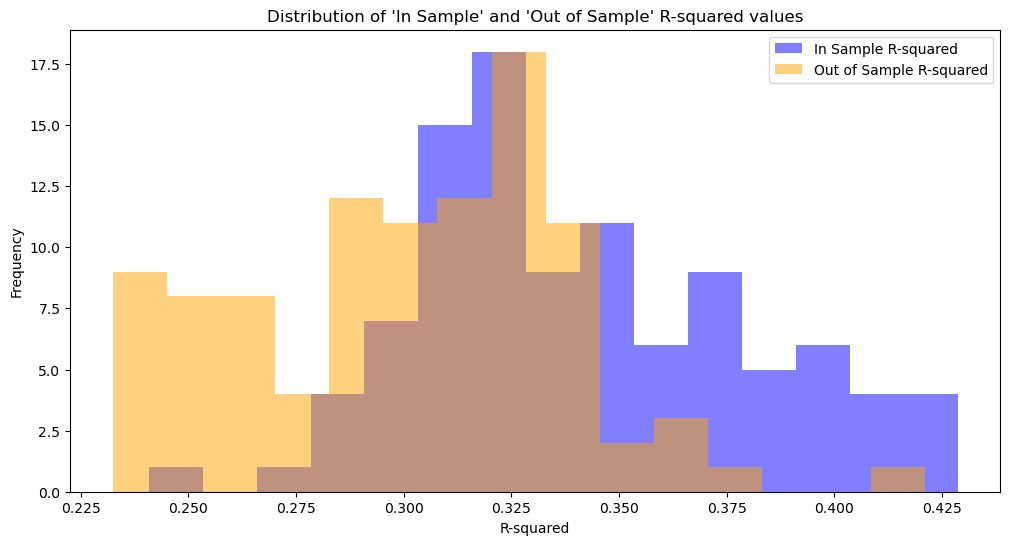

In [14]:
# QUESTION 8)

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the data
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url).fillna('None')

# Define the model formula
model_formula = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk") + I(Q("Type 1")=="Normal") + I(Q("Type 1")=="Water") + I(Generation==2) + I(Generation==5)'

# Initialize lists to store R-squared values
in_sample_r2 = []
out_of_sample_r2 = []

# Run multiple model fits without setting a seed
for i in range(100):
    # Split the data randomly
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5)
    
    # Fit the model on training data
    model_spec = smf.ols(formula=model_formula, data=pokeaman_train)
    model_fit = model_spec.fit()
    
    # Calculate "in sample" R-squared
    in_sample_r2.append(model_fit.rsquared)
    
    # Calculate "out of sample" R-squared
    yhat_test = model_fit.predict(pokeaman_test)
    y_test = pokeaman_test.HP
    out_of_sample_r2.append(np.corrcoef(y_test, yhat_test)[0, 1]**2)

# Visualize the "in sample" and "out of sample" R-squared distributions
plt.figure(figsize=(12, 6))
plt.hist(in_sample_r2, bins=15, alpha=0.5, label='In Sample R-squared', color='blue')
plt.hist(out_of_sample_r2, bins=15, alpha=0.5, label='Out of Sample R-squared', color='orange')
plt.xlabel("R-squared")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of 'In Sample' and 'Out of Sample' R-squared values")
plt.show()


QUESTION 8) The histogram shows the distributions of "in-sample" and "out-of-sample" R^2 values across 100 random train-test splits, illustrating the model's consistency and generalizability. "In-sample" R^2 is generally higher, as expected, since the model is optimized for the training data, while "out-of-sample" R^2 is lower, reflecting the drop in performance on unseen data. The overlap between distributions shows that some splits lead to better generalization than others, depending on how representative the training and testing datasets are. This demonstration highlights the variability in performance due to data sampling and emphasizes the importance of repeated evaluations to assess a model's robustness and ability to generalize beyond the training data.

QUESTION 9)

The results highlight the trade-off between complexity and generalizability in `model7_fit` and `model6_fit`. While `model7_fit` shows slightly better "out-of-sample" \(R^2\) in the random split scenario (\(R^2 = 0.351\) vs. \(R^2 = 0.296\)), it struggles in more realistic sequential prediction setups. For example, when predicting future generations, `model7_fit` suffers a sharp drop in \(R^2\) (e.g., \(R^2 = 0.112\) for `gen1_predict_future`), indicating poor generalizability due to its complexity. In contrast, `model6_fit`, being simpler, maintains better generalization (e.g., \(R^2 = 0.193\) for `gen1_predict_future`) and is easier to interpret. These results suggest that while complex models like `model7_fit` may slightly outperform in idealized scenarios, simpler models like `model6_fit` are more reliable and interpretable in real-world applications, where robustness and consistency are key.


SUMMARY OF CHATS:

Here's a summary of our recent conversations:

1. **Multiple Regression and Logistic Regression Models**:
   - We discussed building models for a dataset based on the Canadian Social Connection Survey. Initially, we explored multiple linear regression, but then shifted to logistic regression to handle binary outcomes. We examined ways to specify linear forms using combinations of continuous, binary, and categorical predictors.

2. **Design Matrix, Multicollinearity, and Generalization**:
   - We explored how linear form specifications (e.g., `model4_linear_form`) create predictor variables in the design matrix and discussed how multicollinearity impacts model performance, particularly the "out of sample" generalizability. Using `np.corrcoef()` with model specifications helped demonstrate the effect of high multicollinearity in complex models.

3. **Model Extensions (Model5, Model6, Model7)**:
   - Starting with simpler models (e.g., `model5_linear_form`), we incrementally added relevant predictor interactions and transformations in `model6` and `model7`. Centering and scaling continuous predictors were applied to reduce multicollinearity and improve model conditioning.

4. **Experimenting with "In Sample" and "Out of Sample" R-squared**:
   - We ran a loop to repeatedly split the data without a set seed, capturing "in sample" and "out of sample" R-squared values to assess model performance across different samples. This illustrated the trade-off between model fit and generalizability.

5. **Results Analysis of Various Models**:
   - We reviewed R-squared values for models trained on different subsets (e.g., "gen1_predict_future" and "gen1to5_predict_future") and analyzed how training on diverse generations improves generalizability. We found that using Gen 1 alone led to overfitting, while including more generations in the training data balanced fit and prediction accuracy better.

Let me know if you'd like further assistance or another review of any part!

LINK TO CHAT:

https://chatgpt.com/share/6736cbb9-6d2c-800c-b146-87770e92fa23